In [1]:
from ml_core import ML_core
from recommend_analyzer import Analyze
from Recommendation import Recommend
from ModifiedLabelEncoder import ModifiedLabelEncoder
import pandas as pd
import time
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
pd.set_option('display.max_columns', None)


In [2]:
train_data = pd.read_csv('data/name_attached/train_data_incl_names.csv')
predict_data = pd.read_csv('data/name_attached/prediction_data_incl_names.csv') 


In [3]:
start_time = time.time()
none_informative = ['Name', 'Unnamed: 0']
train_data = train_data.drop(none_informative, 1)
predict_data = predict_data.drop(none_informative, 1)
ml_core = ML_core(train_data, predict_data)
train_score = ml_core.train()
result = ml_core.predict()

train_data_led = ml_core.label_encoder.transform(train_data)
recommender = Recommend(train_data_led, 'Attrition')
need_recommendation = result[result.Attrition==1]
recommends_list = []
for person_indx in range(need_recommendation.shape[0]):
    person = ml_core.label_encoder.transform(need_recommendation.iloc[person_indx:person_indx+1])
    recoms = recommender.recommend(person)
    analyzer = Analyze(need_recommendation.iloc[person_indx:person_indx+1], train_data.iloc[recoms.index])
    an = analyzer.analyze()
    recommends_list.append(an)
    
result['recommendations'] = 'NaN'
result.loc[result.Attrition==1, 'recommendations'] = recommends_list

end_time = time.time()
print(f'stopped at {end_time - start_time:.3f}')

stopped at 3.513


In [4]:
ml_core.model.feature_importances_

array([0.01917008, 0.02967014, 0.00479639, 0.00618927, 0.01466327,
       0.00645595, 0.01130783, 0.05139424, 0.03141258, 0.0062637 ,
       0.0407491 , 0.03406761, 0.05328419, 0.10091881, 0.04928689,
       0.00537981, 0.00386482, 0.01444998, 0.        , 0.19846421,
       0.01160416, 0.        , 0.02788587, 0.        , 0.0952158 ,
       0.01771494, 0.01667993, 0.07286964, 0.02109328, 0.03181269,
       0.00915865, 0.01417622], dtype=float32)

In [4]:
train_score

0.954954954954955

In [5]:
x = zip(train_data.drop('Attrition',1).columns,ml_core.model.feature_importances_)
dict(x)

{'Age': 0.019170083,
 'BusinessTravel': 0.029670136,
 'DailyRate': 0.0047963946,
 'Department': 0.006189266,
 'DistanceFromHome': 0.014663268,
 'Education': 0.0064559495,
 'EducationField': 0.011307831,
 'EmployeeCount': 0.051394235,
 'EmployeeNumber': 0.031412575,
 'EnvironmentSatisfaction': 0.006263701,
 'Gender': 0.040749095,
 'HourlyRate': 0.034067612,
 'JobInvolvement': 0.053284187,
 'JobLevel': 0.10091881,
 'JobRole': 0.049286895,
 'JobSatisfaction': 0.005379811,
 'MaritalStatus': 0.003864818,
 'MonthlyIncome': 0.014449977,
 'MonthlyRate': 0.0,
 'NumCompaniesWorked': 0.19846421,
 'Over18': 0.011604155,
 'OverTime': 0.0,
 'PercentSalaryHike': 0.027885865,
 'PerformanceRating': 0.0,
 'RelationshipSatisfaction': 0.0952158,
 'StandardHours': 0.017714938,
 'StockOptionLevel': 0.016679928,
 'TotalWorkingYears': 0.07286964,
 'TrainingTimesLastYear': 0.021093275,
 'WorkLifeBalance': 0.03181269,
 'YearsAtCompany': 0.009158651,
 'YearsInCurrentRole': 0.014176219}

In [7]:
import xgboost as xgb

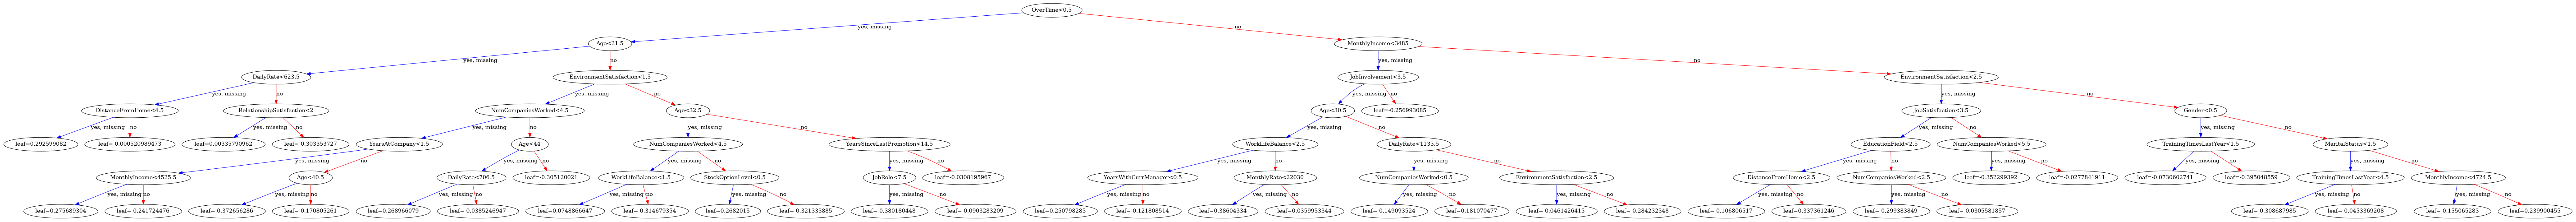

In [9]:
xgb.plot_tree(ml_core.model, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

<Figure size 1152x1152 with 0 Axes>

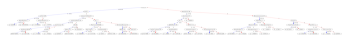

In [10]:
plt.figure(figsize=(16,16))
xgb.plot_tree(ml_core.model, num_trees=2)

In [7]:
result[result.Attrition==1]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,recommendations
6,29,Travel_Rarely,332,Human Resources,17,3,Other,1,1419,2,Male,51,2,3,Human Resources,1,Single,7988,9769,1,Y,No,13,3,1,80,0,10,3,2,10,9,0,9,1,"{""RelationshipSatisfaction"":2,""WorkLifeBalance..."
13,31,Travel_Frequently,667,Sales,1,4,Life Sciences,1,1427,2,Female,50,1,1,Sales Representative,3,Single,1359,16154,1,Y,No,12,3,2,80,0,1,3,3,1,0,0,0,1,"{""RelationshipSatisfaction"":3,""EnvironmentSati..."
17,31,Travel_Rarely,202,Research & Development,8,3,Life Sciences,1,1433,1,Female,34,2,1,Research Scientist,2,Single,1261,22262,1,Y,No,12,3,3,80,0,1,3,4,1,0,0,0,1,"{""EnvironmentSatisfaction"":2,""PercentSalaryHik..."
29,41,Travel_Rarely,1283,Research & Development,5,5,Medical,1,1448,2,Male,90,4,1,Research Scientist,3,Married,2127,5561,2,Y,Yes,12,3,1,80,0,7,5,2,4,2,0,3,1,"{""RelationshipSatisfaction"":3,""MonthlyRate"":17..."
33,39,Non-Travel,592,Research & Development,2,3,Life Sciences,1,1458,1,Female,54,2,1,Laboratory Technician,1,Single,3646,17181,2,Y,Yes,23,4,2,80,0,11,2,4,1,0,0,0,1,"{""EnvironmentSatisfaction"":3,""DailyRate"":798,""..."
37,31,Travel_Frequently,523,Research & Development,2,3,Life Sciences,1,1464,2,Male,94,3,1,Laboratory Technician,4,Married,3722,21081,6,Y,Yes,13,3,3,80,1,7,2,1,2,2,2,2,1,"{""WorkLifeBalance"":2,""EnvironmentSatisfaction""..."
58,29,Travel_Frequently,115,Sales,13,3,Technical Degree,1,1487,1,Female,51,3,2,Sales Executive,2,Single,5765,17485,5,Y,No,11,3,1,80,0,7,4,1,5,3,0,0,1,"{""RelationshipSatisfaction"":2,""WorkLifeBalance..."
59,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,Female,40,2,2,Sales Executive,2,Single,4599,7815,0,Y,Yes,23,4,3,80,0,16,2,4,15,9,10,10,1,"{""MonthlyRate"":17725,""EnvironmentSatisfaction""..."
61,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,Male,89,3,1,Laboratory Technician,1,Single,3172,16998,2,Y,Yes,11,3,3,80,0,4,2,2,0,0,0,0,1,"{""MonthlyRate"":17211,""EnvironmentSatisfaction""..."
69,28,Travel_Frequently,289,Research & Development,2,2,Medical,1,1504,3,Male,38,2,1,Laboratory Technician,1,Single,2561,5355,7,Y,No,11,3,3,80,0,8,2,2,0,0,0,0,1,"{""MonthlyRate"":12521,""PercentSalaryHike"":17,""D..."


In [15]:
import joblib

In [16]:
joblib.dump(ml_core.model,'ml_core_model.joblib')

['ml_core_model.joblib']

In [17]:
model = joblib.load('ml_core_model.joblib')